<a href="https://colab.research.google.com/github/abhizz09/YOLOv3-GoogleColab/blob/master/numberPlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing  Requried Libraries**

In [0]:
import cv2
from google.colab.patches import cv2_imshow

**Mount your google Drive with Colab**

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Reading And  Displaying The Image**

In [0]:
img = cv2.imread("/content/gdrive/My Drive/croped_contors_images/VW_Jetta_Front.jpg")

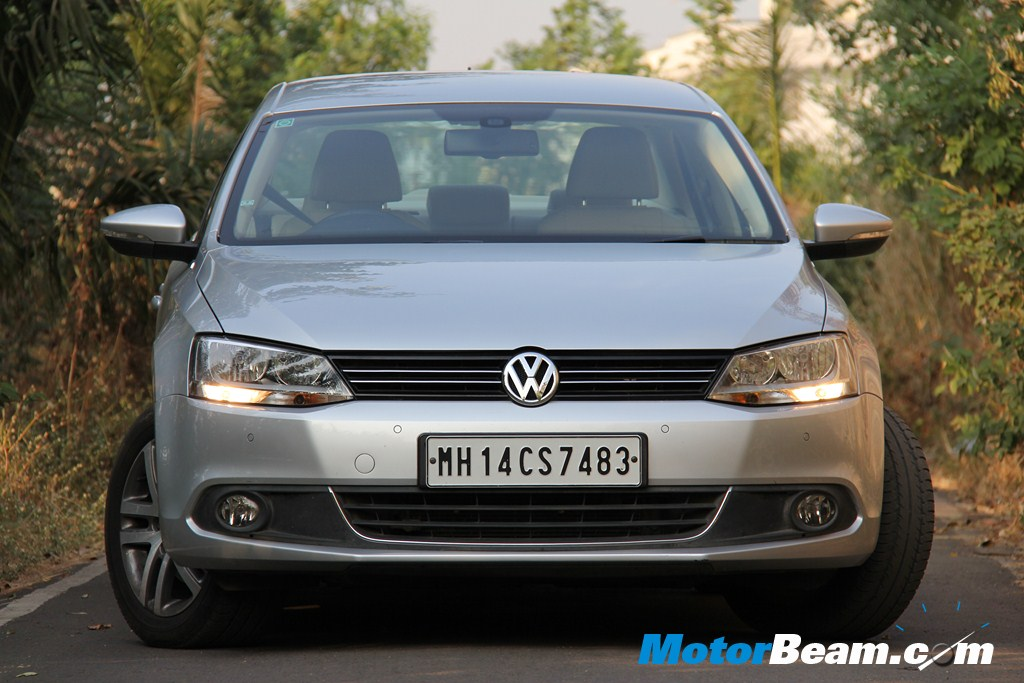

In [28]:
cv2_imshow(img)

**Image Pre-Prosseing**

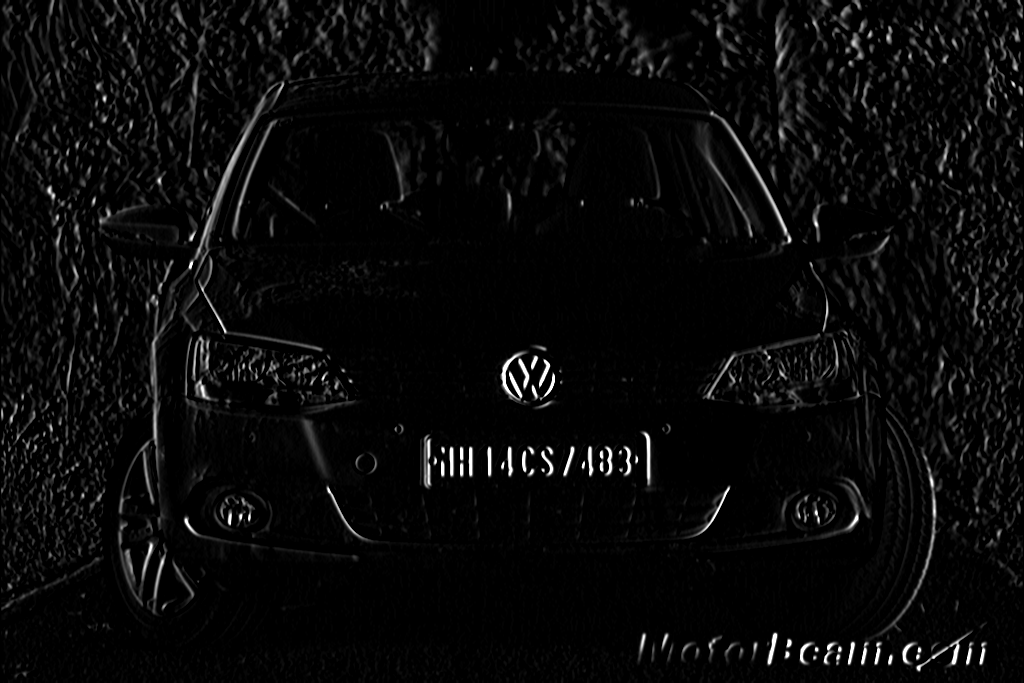

In [29]:
imgBlurred = cv2.GaussianBlur(img, (5,5), 0) # removing gaussian noise from the image
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY) # converting BGR image to Grey

sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3) # applying sobelX Filter
cv2_imshow(sobelx)
	
ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

**Contours Extraction**

In [0]:
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = threshold_img.copy()
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
im2,contours,_ = cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

**Draw Contours On The Image**

In [0]:
img_copy = img.copy()

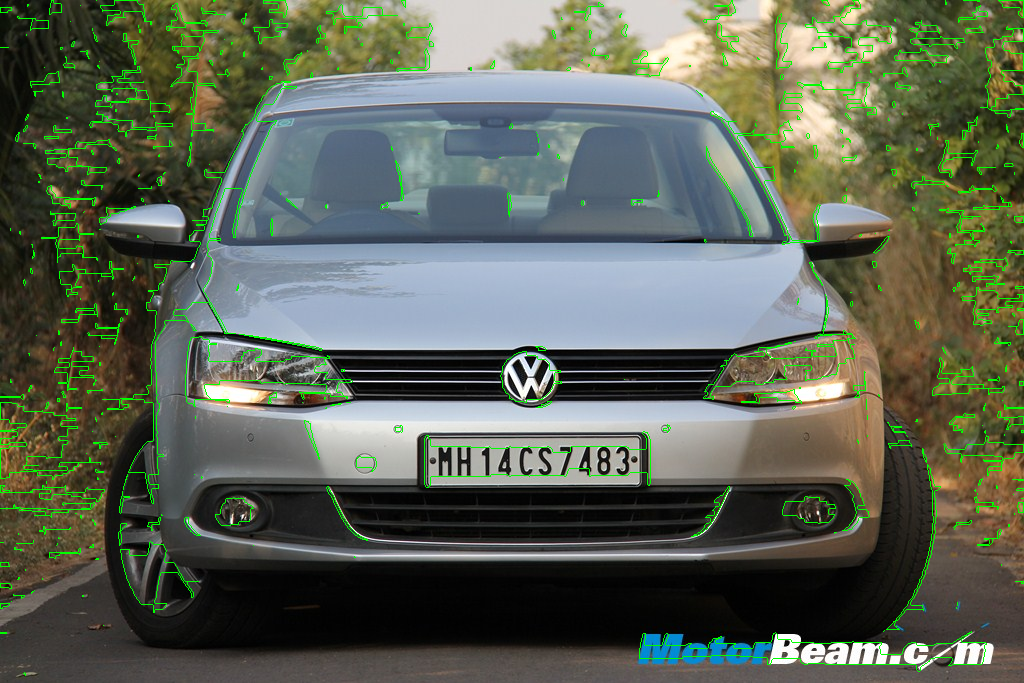

In [32]:
cv2.drawContours(img_copy, contours, -1, (0,255,0), 1)
cv2_imshow(img_copy)


**Filterning the Unwated Contours from the image**

In [0]:
def validateRotationAndRatio(rect):
	(x, y), (width, height), rect_angle = rect

	if(width>height):
		angle = -rect_angle
	else:
		angle = 90 + rect_angle

	if angle>15:
	 	return False

	if height == 0 or width == 0:
		return False

	area = height*width
	

	return True

((24.500001907348633, 673.5), (1.4142134189605713, 2.8284268379211426), -45.0)
((3.0, 632.5), (1.0, 6.0), -90.0)


((812.5060424804688, 651.676025390625), (347.072021484375, 39.73418045043945), -0.29232290387153625)


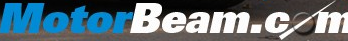

((883.5, 630.5), (1.4142135381698608, 0.0), -45.0)
((103.0, 625.0), (0.0, 0.0), 0.0)
((956.0, 607.5), (1.0, 0.0), 90.0)
((4.5, 605.5), (5.0, 9.0), -90.0)


((957.0, 603.5), (3.0, 0.0), 90.0)
((11.0, 601.0), (0.0, 0.0), 0.0)
((82.5, 595.5), (1.0, 1.0), -90.0)


((18.397546768188477, 596.1270751953125), (3.259286880493164, 11.135895729064941), -84.80557250976562)


((32.25003433227539, 591.2500610351562), (4.242640495300293, 0.7071067094802856), -45.0)
((5.5, 585.5), (5.0, 11.0), -90.0)


((1019.0, 582.0), (2.0, 8.0), -90.0)


((42.0, 578.5), (1.0, 0.0), 90.0)
((18.200002670288086, 578.1000366210938), (2.683281421661377, 1.3416407108306885), -63.43495178222656)
((25.0, 569.5), (1.0, 0.0), 90.0)
((1001.0, 564.5), (1.0, 0.0), 90.0)
((4.5, 564.0), (4.0, 9.0), -90.0)


((96.5, 558.5), (3.0, 1.0), 0.0)


((354.2500305175781, 556.7500610351562), (0.7071067094802856, 1.4142134189605713), -45.0)
((101.0, 548.0), (0.0, 0.0), 0.0)
((64.60917663574219, 553.3187866210938), (31.91753578186035, 6.740349292755127), -7.594643592834473)


((17.499998092651367, 548.5000610351562), (2.1371870040893555, 7.39795446395874), -80.53767395019531)


((253.0, 545.0), (0.0, 0.0), 0.0)
((91.0, 545.5), (4.0, 3.0), 0.0)


((56.700008392333984, 544.1000366210938), (2.2360680103302, 0.4472135603427887), -63.43495178222656)
((1.5, 542.0), (3.0, 0.0), 0.0)
((158.93104553222656, 571.82763671875), (65.73614501953125, 71.3070068359375), -21.80141258239746)
((24.74161148071289, 542.869140625), (17.262676239013672, 2.780565023422241), -10.007979393005371)


((58.249977111816406, 537.7500610351562), (0.7071067094802856, 1.4142134189605713), -45.0)
((18.0, 533.5), (1.0, 0.0), 90.0)
((835.0, 532.5), (1.0, 2.0), -90.0)


((989.9962158203125, 538.7808227539062), (28.1535587310791, 8.595168113708496), -37.87498474121094)
((54.44608688354492, 530.4017944335938), (7.994089603424072, 30.900230407714844), -87.79740142822266)


((1008.5, 525.0), (2.0, 1.0), -90.0)
((120.38851928710938, 533.3789672851562), (23.081205368041992, 6.038359642028809), -73.61045837402344)
((961.8999633789062, 523.2000122070312), (19.28989028930664, 6.008327007293701), -18.434947967529297)
((93.69999694824219, 521.9000244140625), (1.3416407108306885, 6.708203315734863), -26.56505012512207)
((190.76925659179688, 527.15380859375), (6.656402587890625, 23.297409057617188), -33.690067291259766)
((154.24118041992188, 522.3646850585938), (15.727458000183105, 8.67721939086914), -40.601295471191406)
((80.5, 516.5), (3.0, 1.0), -90.0)
((161.25, 514.75), (0.7071067094802856, 1.4142134189605713), -45.0)
((1014.0, 513.5), (1.0, 0.0), 90.0)
((75.5, 513.0), (1.0, 0.0), 0.0)
((1020.0, 507.0), (6.0, 10.0), -0.0)
((47.20000457763672, 509.8999938964844), (94.16648864746094, 14.49813175201416), -2.337306022644043)


((997.0, 501.0), (0.0, 0.0), 0.0)
((1022.0, 498.0), (2.0, 0.0), 0.0)
((234.0, 511.0), (38.0, 28.0), -0.0)


((986.01220703125, 502.5770568847656), (22.614574432373047, 16.116132736206055), -8.972626686096191)


((808.4414672851562, 509.2034606933594), (26.076284408569336, 52.73387908935547), -85.2363510131836)


((1013.0, 494.0), (0.0, 0.0), 0.0)
((977.0, 493.5), (1.0, 0.0), 90.0)
((123.35295104980469, 502.5882873535156), (21.828205108642578, 8.246211051940918), -75.96376037597656)
((975.0001220703125, 490.0000915527344), (1.4142134189605713, 1.4142134189605713), -45.0)
((1019.5, 489.0), (7.0, 2.0), -0.0)


((712.0317993164062, 512.2981567382812), (62.593605041503906, 9.925089836120605), -57.425941467285156)
((343.9399719238281, 515.2517700195312), (8.996586799621582, 67.20085144042969), -36.34745788574219)
((996.5, 486.5), (1.0, 3.0), -0.0)
((51.850074768066406, 491.89813232421875), (14.796751976013184, 104.15376281738281), -87.79740142822266)


((46.0, 482.0), (2.0, 0.0), 90.0)
((1017.5, 479.5), (1.0, 11.0), -90.0)


((856.300048828125, 505.0022277832031), (51.21610641479492, 26.351760864257812), -87.45519256591797)
((979.7413940429688, 481.3965759277344), (7.984899520874023, 2.414039373397827), -68.19859313964844)
((23.0, 478.0), (0.0, 0.0), 0.0)
((97.5, 478.0), (1.0, 2.0), -0.0)
((201.00003051757812, 477.00006103515625), (1.4142134189605713, 1.4142134189605713), -45.0)
((959.0, 475.0), (2.0, 0.0), 90.0)
((194.0, 474.0), (0.0, 0.0), 0.0)
((124.7891845703125, 481.4351501464844), (15.513030052185059, 1.0293006896972656), -72.89727020263672)
((99.0, 470.5), (3.0, 8.0), -90.0)


((921.7007446289062, 550.2771606445312), (170.0176544189453, 31.326160430908203), -76.04548645019531)
((365.9263916015625, 463.53045654296875), (14.178163528442383, 20.44790267944336), -85.91438293457031)


((86.0, 453.0), (0.0, 0.0), 0.0)
((923.7808227539062, 455.0822448730469), (2.808987855911255, 14.513101577758789), -20.556045532226562)
((100.0, 445.0), (6.0, 14.0), -90.0)


((899.4506225585938, 443.48089599609375), (22.896398544311523, 7.205491065979004), -5.440331935882568)


((857.5001220703125, 441.00006103515625), (0.8944271206855774, 4.0249223709106445), -26.56505012512207)
((115.0, 436.0), (0.0, 0.0), 0.0)
((981.5879516601562, 453.80517578125), (38.63035202026367, 79.62422180175781), -76.32869720458984)


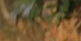

((906.5, 435.5), (1.4142135381698608, 0.0), 45.0)
((867.0, 435.5), (1.0, 0.0), 90.0)
((1004.0, 434.5), (1.0, 0.0), 90.0)
((536.9772338867188, 458.98663330078125), (226.3979949951172, 54.05208969116211), -0.5184996724128723)


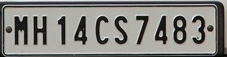

((92.0, 431.0), (0.0, 0.0), 0.0)
((1022.0, 431.0), (2.0, 2.0), -90.0)


((984.5, 431.5), (1.0, 3.0), -0.0)
((982.0, 425.0), (0.0, 0.0), 0.0)
((398.5, 428.5), (7.0, 7.0), -0.0)
((666.7500610351562, 428.25006103515625), (7.77817440032959, 5.656853675842285), -45.0)
((895.7081909179688, 428.4486389160156), (7.793276309967041, 20.4389705657959), -72.89727020263672)
((896.0, 420.0), (0.0, 0.0), 0.0)
((311.3755798339844, 439.53326416015625), (5.861825466156006, 41.54810333251953), -14.931416511535645)
((916.0, 420.0), (2.0, 2.0), 0.0)
((95.50001525878906, 419.00006103515625), (0.8944271206855774, 4.0249223709106445), -26.56505012512207)
((195.0, 417.0), (2.0, 0.0), 90.0)
((867.0, 417.0), (4.0, 0.0), 90.0)
((961.06103515625, 420.0487365722656), (25.612497329711914, 16.398244857788086), -51.34019470214844)
((101.5, 413.0), (1.0, 2.0), -0.0)
((1009.4765625, 421.4079284667969), (16.31459617614746, 27.530881881713867), -77.7352294921875)


((325.7500305175781, 407.75006103515625), (1.4142134189605713, 0.7071067094802856), -45.0)
((793.5001220703125, 407.00006103515625), (3.535533905029297, 2.1213202476501465), -45.0)
((227.0, 406.0), (0.0, 0.0), 0.0)
((1013.5, 406.5), (19.0, 5.0), -0.0)


((983.9039306640625, 406.4808044433594), (7.2562971115112305, 1.5689290761947632), -78.69007110595703)
((335.5135192871094, 404.08111572265625), (11.179131507873535, 1.3151918649673462), -9.462322235107422)


((73.5, 407.0), (8.0, 15.0), -90.0)


((348.0, 402.0), (4.0, 0.0), 0.0)
((302.0, 402.0), (0.0, 0.0), 0.0)
((46.735294342041016, 405.05889892578125), (6.5484619140625, 2.425356388092041), -75.96376037597656)
((50.0, 440.5), (77.0, 100.0), -90.0)


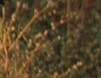

((543.800048828125, 404.60003662109375), (16.099689483642578, 3.5777084827423096), -26.56505012512207)
((1002.0, 400.0), (0.0, 0.0), 0.0)
((866.0, 404.0), (10.0, 0.0), 90.0)
((58.0, 399.5), (3.0, 2.0), -90.0)
((324.5, 398.0), (2.0, 1.0), -90.0)
((878.5001220703125, 395.00006103515625), (0.7071067094802856, 2.1213202476501465), -45.0)
((11.5, 396.5), (23.0, 5.0), -0.0)


((271.7500305175781, 397.25006103515625), (13.435027122497559, 5.656853675842285), -45.0)
((63.24138259887695, 394.10345458984375), (2.5997347831726074, 6.685031890869141), -21.801406860351562)
((771.0, 396.0), (60.0, 14.0), -0.0)


((94.53553771972656, 390.9974365234375), (15.17562198638916, 3.0636231899261475), -4.085616588592529)


((799.5, 387.5), (1.0, 1.0), -90.0)


((29.69998550415039, 388.1000671386719), (6.708203315734863, 2.236067771911621), -63.43495178222656)
((1021.0, 383.0), (4.0, 4.0), -90.0)


((624.0, 379.0), (0.0, 0.0), 0.0)
((94.20001983642578, 382.10003662109375), (6.260990142822266, 1.3416407108306885), -63.43495178222656)
((10.5, 380.5), (1.0, 3.0), -0.0)
((993.87158203125, 379.7385559082031), (11.398133277893066, 4.7891316413879395), -16.699243545532227)
((859.0, 384.0), (12.0, 26.0), -0.0)
((342.5, 370.0), (2.0, 3.0), -90.0)


((1005.5, 368.0), (1.0, 6.0), -0.0)
((99.5, 363.5), (3.0, 1.0), -90.0)
((1012.0, 359.0), (0.0, 0.0), 0.0)
((969.3569946289062, 383.296875), (38.83177947998047, 70.12310028076172), -77.6609115600586)


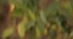

((28.5, 354.0), (2.0, 1.0), -90.0)
((1013.0, 351.0), (0.0, 0.0), 0.0)
((527.8873291015625, 376.1474609375), (57.0462760925293, 53.14120864868164), -40.10091018676758)
((943.7691650390625, 350.6537780761719), (1.6641007661819458, 8.043152809143066), -33.6900634765625)
((74.71925354003906, 369.0063171386719), (43.584503173828125, 36.7322998046875), -38.1572265625)
((53.200016021728516, 348.4000244140625), (3.1622774600982666, 0.6324554085731506), -71.56504821777344)
((540.5, 348.0), (4.0, 11.0), -90.0)


((99.0, 346.0), (0.0, 0.0), 0.0)
((794.5, 341.0), (1.0, 0.0), 0.0)
((60.5, 343.0), (1.0, 4.0), -0.0)
((1002.2899780273438, 340.9700012207031), (6.363961219787598, 16.12203598022461), -81.8698959350586)


((267.41021728515625, 367.2942199707031), (167.5050048828125, 69.6930160522461), -3.012787342071533)


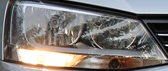

((36.0, 335.0), (0.0, 0.0), 0.0)
((280.6538391113281, 340.73077392578125), (3.1378581523895264, 84.32994079589844), -78.69007110595703)


((984.0, 331.5), (1.0, 0.0), 90.0)
((58.5, 332.0), (1.0, 4.0), -0.0)
((192.65383911132812, 327.2307434082031), (2.4961509704589844, 8.320503234863281), -33.690067291259766)
((104.04954528808594, 329.1902160644531), (21.480260848999023, 29.730716705322266), -70.90650939941406)
((916.9000854492188, 324.2000732421875), (3.4785051345825195, 9.803058624267578), -18.43494987487793)
((1015.5, 326.5), (15.0, 15.0), 0.0)
((121.0, 319.0), (2.0, 4.0), -0.0)
((1013.2500610351562, 314.2499694824219), (1.4142134189605713, 3.535533905029297), -45.0)
((1020.0, 309.0), (2.0, 6.0), -90.0)


((120.92899322509766, 308.47039794921875), (6.307693004608154, 15.461540222167969), -67.38013458251953)
((78.88532257080078, 314.2843933105469), (38.69618225097656, 13.696917533874512), -16.69924545288086)
((851.0, 303.5), (2.0, 5.0), -0.0)
((797.5, 301.0), (1.0, 6.0), -0.0)
((80.0, 298.5), (1.0, 0.0), 90.0)
((778.7216186523438, 367.5705871582031), (160.1803436279297, 73.11017608642578), -32.957427978515625)
((850.5, 292.0), (1.0, 0.0), 0.0)
((112.5, 293.5), (1.0, 3.0), -0.0)
((991.9404296875, 299.573974609375), (58.281654357910156, 38.39379119873047), -32.735225677490234)
((953.60009765625, 288.800048828125), (4.4721360206604, 2.683281421661377), -63.43495178222656)
((1019.0, 287.0), (2.0, 8.0), -90.0)


((879.1000366210938, 287.7000732421875), (2.236067771911621, 5.813776969909668), -26.56505012512207)
((237.45001220703125, 287.1499938964844), (6.324554920196533, 1.5811387300491333), -71.56504821777344)
((958.0, 284.0), (2.0, 4.0), -0.0)
((98.0, 280.5), (1.0, 0.0), 90.0)
((24.0, 282.0), (2.0, 6.0), -0.0)
((133.3999786376953, 278.2000427246094), (4.4721360206604, 0.8944271206855774), -63.43495178222656)
((987.933349609375, 280.59844970703125), (31.86865234375, 10.702159881591797), -2.726310968399048)


((31.0, 270.5), (5.0, 2.0), -90.0)
((971.9359741210938, 269.8520202636719), (8.854829788208008, 18.24631690979004), -79.69515228271484)


((137.0, 263.0), (0.0, 0.0), 0.0)
((815.300048828125, 273.6000671386719), (2.683281421661377, 26.385601043701172), -26.56505012512207)
((874.0, 264.0), (6.0, 4.0), -90.0)
((90.12931823730469, 272.30169677734375), (63.81493377685547, 29.543947219848633), -23.198589324951172)
((990.66845703125, 264.6065368652344), (32.97465133666992, 12.878854751586914), -4.573921203613281)


((1015.0, 252.0), (16.0, 4.0), 0.0)


((33.31080627441406, 254.13514709472656), (8.055550575256348, 1.972787857055664), -80.53767395019531)
((951.9278564453125, 255.0876007080078), (7.310492992401123, 15.331727027893066), -23.96249008178711)
((31.949996948242188, 245.3500213623047), (0.9486832022666931, 3.1622774600982666), -18.434947967529297)
((1010.5, 242.0), (2.0, 1.0), -90.0)
((704.7000732421875, 240.39996337890625), (1.7888542413711548, 3.130495071411133), -26.56505012512207)
((881.7171630859375, 244.60687255859375), (22.549259185791016, 3.758209466934204), -49.76364517211914)
((137.5, 236.0), (2.0, 1.0), -90.0)
((860.0001220703125, 235.00003051757812), (2.8284268379211426, 1.4142134189605713), -45.0)
((949.5, 235.0), (4.0, 1.0), -90.0)
((875.0, 233.0), (0.0, 0.0), 0.0)
((19.5, 232.5), (3.0, 1.0), -90.0)
((888.7501220703125, 229.75003051757812), (1.4142134189605713, 0.7071067094802856), -45.0)
((99.5, 229.0), (1.0, 0.0), 0.0)
((10.0, 229.0), (2.0, 0.0), 90.0)
((68.42277526855469, 244.39236450195312), (52.136863708496

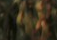

((271.0, 226.5), (2.0, 17.0), -0.0)
((1018.5, 219.0), (6.0, 9.0), -90.0)


((1007.2501220703125, 214.75003051757812), (0.7071067094802856, 1.4142134189605713), -45.0)
((418.5, 213.0), (1.0, 0.0), 0.0)
((83.5, 211.5), (1.4142135381698608, 0.0), -45.0)
((62.11207962036133, 218.8489532470703), (13.716179847717285, 25.39885711669922), -85.42607879638672)


((961.1312255859375, 227.0069122314453), (36.58094787597656, 46.09409713745117), -86.98721313476562)


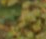

((913.0, 208.5), (3.0, 2.0), -90.0)
((114.9000015258789, 209.80001831054688), (39.35479736328125, 12.969194412231445), -26.56505012512207)
((325.5, 206.0), (1.0, 4.0), -0.0)
((145.0, 204.0), (0.0, 0.0), 0.0)
((383.64996337890625, 205.4500274658203), (8.538147926330566, 5.059643268585205), -18.43494987487793)
((582.0, 202.5), (2.0, 5.0), -0.0)
((168.25001525878906, 200.75003051757812), (0.7071067094802856, 1.4142134189605713), -45.0)
((636.5, 202.0), (6.0, 11.0), -90.0)


((291.35369873046875, 203.18295288085938), (2.030258893966675, 14.836507797241211), -51.34019470214844)
((142.0, 199.5), (3.0, 2.0), -90.0)
((991.5000610351562, 204.50001525878906), (38.07809066772461, 12.369316101074219), -14.03624439239502)


((844.0, 198.5), (4.0, 7.0), -0.0)
((280.0, 193.5), (1.0, 0.0), 90.0)
((509.2470703125, 203.9533233642578), (3.7426974773406982, 24.015640258789062), -3.5763344764709473)
((915.5, 193.0), (1.0, 4.0), -0.0)
((658.2692260742188, 193.1538543701172), (6.079599857330322, 1.7650452852249146), -78.69007110595703)
((77.5, 191.5), (1.0, 3.0), -0.0)
((846.0, 189.0), (2.0, 0.0), 90.0)
((144.65028381347656, 187.9768829345703), (13.152946472167969, 1.9767435789108276), -8.746162414550781)


((976.878662109375, 188.37835693359375), (38.1092643737793, 7.302373886108398), -3.2704880237579346)


((947.0000610351562, 185.4999542236328), (0.7071067094802856, 2.1213202476501465), -45.0)
((893.0, 185.0), (0.0, 0.0), 0.0)
((69.56153106689453, 199.10769653320312), (17.45345115661621, 50.25542068481445), -74.74488067626953)
((38.5, 181.5), (1.0, 1.0), -90.0)


((91.19559478759766, 184.65673828125), (4.835372447967529, 22.090017318725586), -75.25643920898438)


((563.0, 179.0), (2.0, 0.0), 90.0)
((927.006591796875, 180.7991180419922), (33.10700607299805, 10.837425231933594), -7.594643592834473)


((158.5, 180.5), (5.0, 9.0), 0.0)
((138.50001525878906, 175.00001525878906), (2.1213202476501465, 0.7071067094802856), -45.0)
((39.70000457763672, 175.90000915527344), (1.3416407108306885, 4.919349670410156), -26.56505012512207)
((1014.0, 173.0), (2.0, 0.0), 90.0)
((163.75, 172.75), (2.8284268379211426, 0.7071067094802856), -45.0)
((893.5, 172.0), (6.0, 5.0), -90.0)
((794.5, 170.5), (1.0, 3.0), -0.0)
((986.0, 170.5), (7.0, 18.0), -90.0)


((209.0, 164.0), (0.0, 0.0), 0.0)
((1008.5, 164.5), (9.0, 3.0), -0.0)


((797.0, 162.0), (2.0, 0.0), 90.0)
((399.4959411621094, 179.86895751953125), (4.252817153930664, 40.571353912353516), -7.4958577156066895)
((118.0, 160.5), (2.0, 5.0), -0.0)
((499.5, 157.0), (1.0, 0.0), 0.0)
((849.0751342773438, 158.48841857910156), (14.749547958374023, 5.093915939331055), -8.746162414550781)


((558.0, 156.0), (4.0, 2.0), -90.0)
((158.5, 155.0), (1.0, 2.0), -0.0)
((537.5, 153.5), (1.0, 3.0), -0.0)
((92.0, 152.0), (4.0, 2.0), -90.0)
((916.5, 149.0), (2.0, 1.0), -90.0)
((728.6732788085938, 191.18243408203125), (7.234136581420898, 101.00578308105469), -29.180805206298828)
((391.5, 148.0), (1.0, 4.0), -0.0)
((888.0, 147.5), (5.0, 4.0), -90.0)
((842.5, 146.0), (2.0, 1.0), -90.0)
((815.0, 151.5), (13.0, 4.0), -90.0)
((997.2500610351562, 146.25001525878906), (4.110960960388184, 1.8973664045333862), -71.56504821777344)
((548.5, 145.5), (1.0, 3.0), -0.0)
((29.856163024902344, 143.61643981933594), (4.55183219909668, 12.993412017822266), -65.55604553222656)
((189.5, 154.00001525878906), (24.1867733001709, 2.9768333435058594), -82.87498474121094)
((978.0, 141.5), (1.0, 0.0), 90.0)
((955.8724975585938, 160.86981201171875), (34.326820373535156, 34.16382598876953), -70.97439575195312)
((162.25425720214844, 143.91123962402344), (19.33722686767578, 6.1925859451293945), -6.709836959838867)


((80.9259033203125, 157.60154724121094), (71.11021423339844, 33.639739990234375), -3.6913864612579346)


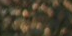

((848.3600463867188, 139.51998901367188), (2.0, 5.600000381469727), -53.13010025024414)
((538.0, 140.0), (4.0, 0.0), 90.0)
((937.0, 138.0), (2.0, 0.0), 90.0)
((51.0, 137.5), (3.0, 14.0), -90.0)


((537.0, 135.0), (2.0, 0.0), 90.0)
((151.5, 136.5), (9.0, 5.0), -0.0)


((1021.0, 140.0), (4.0, 14.0), -0.0)
((807.5, 135.5), (3.0, 5.0), -0.0)
((536.0, 132.0), (0.0, 0.0), 0.0)
((16.73077392578125, 136.3461456298828), (9.41357421875, 3.1378581523895264), -78.69007110595703)
((841.0, 131.0), (4.0, 2.0), -90.0)
((62.0, 128.5), (18.0, 7.0), -0.0)


((24.9999942779541, 128.0), (7.211102485656738, 2.2188007831573486), -56.3099365234375)
((1006.6471557617188, 128.08827209472656), (1.697749376296997, 8.246211051940918), -14.03624439239502)
((933.5548095703125, 128.993896484375), (10.15970230102539, 11.153586387634277), -6.34019136428833)
((755.300048828125, 124.60003662109375), (0.8944271206855774, 3.130495071411133), -26.56505012512207)
((510.5, 125.5), (3.0, 5.0), -0.0)
((756.0, 120.0), (0.0, 0.0), 0.0)
((888.10009765625, 119.20004272460938), (0.8944271206855774, 2.2360680103302), -26.56505012512207)
((66.5, 117.5), (1.0, 1.0), -90.0)


((968.6763916015625, 126.79409790039062), (27.224775314331055, 8.785683631896973), -49.398704528808594)
((798.5, 117.0), (3.0, 4.0), -0.0)
((153.5, 116.0), (2.0, 1.0), -90.0)
((26.5, 117.00001525878906), (6.708203315734863, 1.7888542413711548), -63.43495178222656)
((902.0, 113.5), (1.0, 0.0), 90.0)
((847.5001220703125, 116.00004577636719), (2.1213202476501465, 7.77817440032959), -45.0)
((777.644775390625, 168.71983337402344), (65.32671356201172, 165.56434631347656), -28.979707717895508)
((130.2472686767578, 126.57955932617188), (20.262283325195312, 82.27355194091797), -80.90972137451172)


((115.5, 110.0), (2.0, 1.0), -90.0)
((893.5, 104.0), (3.0, 6.0), -0.0)
((160.0, 106.5), (20.0, 11.0), -0.0)


((116.5, 93.5), (1.0, 1.0), -90.0)


((791.0888061523438, 101.31798553466797), (19.388460159301758, 23.560060501098633), -84.5596694946289)


((62.5, 94.0), (1.0, 6.0), -0.0)
((813.5, 91.0), (2.0, 1.0), -90.0)
((699.2500610351562, 92.7499771118164), (0.7071067094802856, 8.485280990600586), -45.0)
((37.78658676147461, 93.07927703857422), (9.055386543273926, 5.190281867980957), -6.340191841125488)


((902.39599609375, 86.07199096679688), (6.08210563659668, 15.652478218078613), -79.69515228271484)


((836.5033569335938, 97.84049987792969), (33.0138053894043, 79.6628189086914), -88.78113555908203)


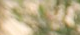

((200.10400390625, 283.951171875), (443.399658203125, 100.38807678222656), -68.93405151367188)
((939.5001220703125, 81.00000762939453), (0.7071067094802856, 2.1213202476501465), -45.0)
((879.0, 79.0), (0.0, 0.0), 0.0)
((270.5, 77.5), (3.0, 3.0), -90.0)


((857.0, 75.0), (2.0, 0.0), 90.0)
((781.5, 76.5), (3.0, 5.0), -0.0)
((311.0, 74.5), (2.0, 5.0), -0.0)
((44.25, 79.25000762939453), (30.201885223388672, 11.178619384765625), -11.309932708740234)


((870.5, 71.0), (1.0, 2.0), -0.0)
((223.48587036132812, 74.17453002929688), (11.16978645324707, 6.604743480682373), -29.05460548400879)
((895.0, 71.5), (24.0, 9.0), -0.0)


((568.5000610351562, 68.50000762939453), (4.242640495300293, 2.8284268379211426), -45.0)
((470.5, 68.5), (3.0, 1.0), -90.0)
((337.5, 68.0), (1.0, 2.0), -0.0)
((261.5, 68.0), (1.0, 2.0), -0.0)
((44.0, 67.0), (0.0, 0.0), 0.0)
((118.61654663085938, 87.66399383544922), (53.91627883911133, 34.57933044433594), -12.200469017028809)


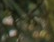

((689.5, 65.5), (1.0, 1.0), -90.0)


((98.00001525878906, 66.50001525878906), (1.3416407108306885, 3.5777084827423096), -26.56505012512207)
((588.5, 65.0), (2.0, 1.0), -90.0)
((99.0, 61.0), (0.0, 0.0), 0.0)
((492.8000183105469, 64.39998626708984), (8.9442720413208, 3.5777084827423096), -63.43495178222656)
((210.90003967285156, 62.29999542236328), (2.236067771911621, 5.813776969909668), -26.56505012512207)
((581.7500610351562, 59.749977111816406), (1.4142134189605713, 0.7071067094802856), -45.0)
((391.0, 61.0), (2.0, 4.0), -0.0)
((369.5384826660156, 59.19231414794922), (3.605551242828369, 1.1094005107879639), -56.3099365234375)
((757.7500610351562, 58.250038146972656), (0.7071067094802856, 2.8284268379211426), -45.0)
((68.90593719482422, 61.94059753417969), (11.044913291931152, 11.343423843383789), -84.2894058227539)


((724.554931640625, 58.99390411376953), (4.1963982582092285, 12.478763580322266), -6.340191841125488)
((195.92739868164062, 94.16047668457031), (41.48918914794922, 81.15284729003906), -22.78240203857422)
((289.99310302734375, 60.96930694580078), (26.922147750854492, 11.169353485107422), -57.7243537902832)
((398.5, 52.0), (1.0, 2.0), -0.0)
((329.0, 52.5), (3.0, 2.0), -90.0)
((243.5, 53.5), (1.0, 5.0), -0.0)
((648.4043579101562, 64.5150146484375), (25.599048614501953, 34.00212478637695), -72.34988403320312)
((307.0, 50.5), (1.0, 0.0), 90.0)
((221.0, 52.0), (2.0, 4.0), -0.0)
((86.0486831665039, 52.73008728027344), (5.362109184265137, 11.382722854614258), -48.8140754699707)
((920.991943359375, 56.051361083984375), (15.908183097839355, 53.339202880859375), -81.02737426757812)


((599.2000732421875, 54.60000991821289), (7.155416965484619, 17.8885440826416), -63.43495178222656)
((415.8348388671875, 66.0104751586914), (37.18650817871094, 18.11067771911621), -34.592288970947266)
((61.0, 48.0), (2.0, 2.0), -90.0)


((4.0, 47.0), (8.0, 0.0), 0.0)
((326.0, 47.5), (3.0, 2.0), -90.0)
((361.0, 44.0), (2.0, 2.0), 0.0)
((818.1707153320312, 45.96341323852539), (15.295625686645508, 5.308071136474609), -12.094757080078125)


((231.5, 43.0), (2.0, 1.0), -90.0)
((589.0, 41.0), (0.0, 0.0), 0.0)
((431.0, 43.5), (5.0, 4.0), -90.0)
((72.50000762939453, 43.500003814697266), (5.692099571228027, 2.5298221111297607), -71.56504821777344)
((224.0, 39.0), (0.0, 0.0), 0.0)
((358.0, 38.5), (1.0, 0.0), 90.0)
((26.0, 34.5), (1.0, 0.0), 90.0)
((133.20001220703125, 46.40000915527344), (14.310833930969238, 33.093807220458984), -26.56505012512207)
((94.88235473632812, 36.5294189453125), (2.425356149673462, 9.701424598693848), -14.03624439239502)
((112.0, 31.0), (0.0, 0.0), 0.0)
((590.0, 34.0), (8.0, 2.0), -90.0)
((553.5, 34.0), (8.0, 3.0), -90.0)
((195.04721069335938, 39.995506286621094), (47.59416580200195, 22.659374237060547), -5.440331935882568)


((139.5, 30.5), (3.0, 1.0), -90.0)
((92.0, 29.0), (2.0, 0.0), 90.0)
((572.0, 28.0), (2.0, 2.0), -90.0)


((1004.6139526367188, 71.25543212890625), (90.59052276611328, 43.015296936035156), -85.15599822998047)
((973.8405151367188, 29.447479248046875), (17.964946746826172, 6.237829208374023), -3.5763344764709473)


((320.8172912597656, 34.19310760498047), (18.186960220336914, 8.802821159362793), -85.2363510131836)
((138.0, 26.0), (2.0, 0.0), 90.0)
((623.8474731445312, 29.8719539642334), (12.147468566894531, 5.632008075714111), -83.6598129272461)
((726.4857788085938, 37.71196746826172), (15.087641716003418, 32.607322692871094), -54.162349700927734)
((419.0, 31.0), (26.0, 16.0), -0.0)


((403.5, 24.0), (2.0, 1.0), -90.0)
((352.2807922363281, 26.582191467285156), (20.0140380859375, 6.905427932739258), -20.556045532226562)
((70.0, 21.0), (0.0, 0.0), 0.0)
((936.6309204101562, 34.45384979248047), (24.806947708129883, 56.1877326965332), -82.87498474121094)


((894.5, 20.0), (2.0, 1.0), -90.0)
((271.1999816894531, 28.900007247924805), (33.73096466064453, 19.408885955810547), -20.2248592376709)
((561.10009765625, 18.20002555847168), (0.8944271206855774, 2.2360680103302), -26.56505012512207)
((32.26791763305664, 23.97269630432129), (12.502013206481934, 32.189762115478516), -83.2901611328125)


((782.2930297851562, 40.3603515625), (15.330848693847656, 54.78156661987305), -2.862405300140381)
((619.8499755859375, 14.949990272521973), (4.427187919616699, 1.5811387300491333), -71.56504821777344)
((243.20590209960938, 18.176469802856445), (11.399173736572266, 3.8805696964263916), -75.96376037597656)
((212.39622497558594, 13.11320686340332), (5.49442195892334, 25.27433967590332), -74.05460357666016)
((5.5, 9.5), (5.0, 11.0), -90.0)


((971.6115112304688, 13.742305755615234), (30.60932159423828, 12.454221725463867), -15.255120277404785)
((80.0, 5.0), (0.0, 0.0), 0.0)
((361.0618896484375, 10.787020683288574), (70.07872009277344, 18.870811462402344), -7.765166282653809)


((27.5, 5.0), (2.0, 1.0), -90.0)
((185.37074279785156, 15.054512023925781), (41.514862060546875, 26.198699951171875), -6.170175075531006)


((589.7534790039062, 11.84246826171875), (29.611413955688477, 12.6404447555542), -20.556045532226562)
((1010.5, 8.5), (17.0, 25.0), -90.0)


((971.0, 0.5), (1.0, 16.0), -90.0)


((945.5, 2.0), (1.0, 4.0), -0.0)
((851.5724487304688, 33.43655014038086), (74.55318450927734, 66.8472671508789), -28.70595359802246)
((825.0, 2.5), (5.0, 8.0), -90.0)


((717.9251708984375, 11.345535278320312), (34.085693359375, 14.390481948852539), -16.389541625976562)
((403.0, 3.5), (7.0, 4.0), -90.0)
((275.0, 8.5), (17.0, 24.0), -90.0)


((214.0, 0.5), (1.0, 2.0), -90.0)


((125.45818328857422, 12.160042762756348), (50.66873550415039, 24.834497451782227), -1.3019527196884155)


((96.0, 0.0), (0.0, 0.0), 0.0)
((55.0, 7.0), (12.0, 14.0), -0.0)


In [34]:
for i,cnt in enumerate(contours):
  min_rect = cv2.minAreaRect(cnt)
  print(min_rect)
  if validateRotationAndRatio(min_rect):

    x,y,w,h = cv2.boundingRect(cnt)
    plate_img = img[y:y+h,x:x+w]
    cv2_imshow(plate_img)

    